In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, leaves_list

In [2]:
combined_dc = pd.read_csv('combined_figures/top50_degree_centrality_all_celltypes.csv')
combined_dc.head()

,cell_type,rank,gene,degree_centrality_all
0,Adipocyte,1,Tcf7l2,0.203156
1,Adipocyte,2,Ebf1,0.193294
2,Adipocyte,3,Zeb1,0.185404
3,Adipocyte,4,Klf12,0.175542
4,Adipocyte,5,Ets1,0.151874


14


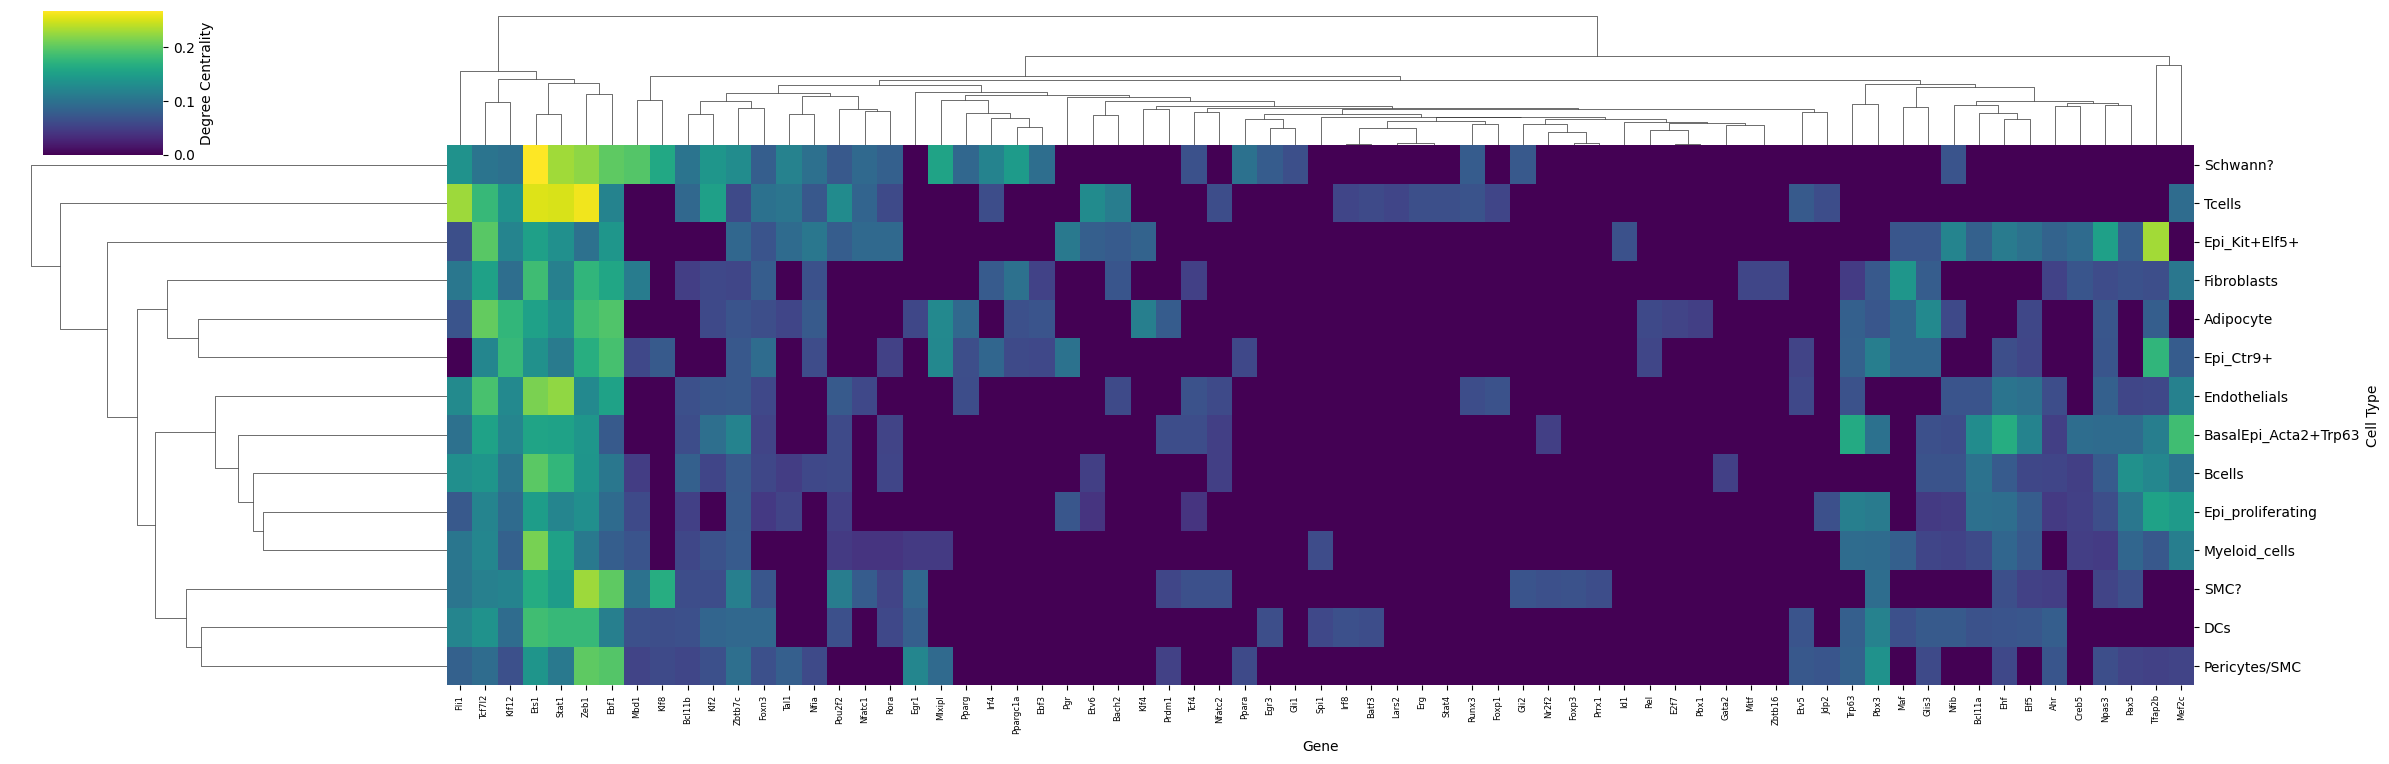

In [12]:
#top 30 genes per cell type
top30 = combined_dc[combined_dc['rank'] <= 30]

heatmap_df = top30.pivot_table(index='cell_type', columns='gene', values='degree_centrality_all', fill_value=0)
print(len(heatmap_df))
# order rows by clustering
row_linkage = linkage(heatmap_df, method='average', metric='euclidean')
row_order = leaves_list(row_linkage)
heatmap_df = heatmap_df.iloc[row_order]

# order columns to form blocks
# For each gene, find which cell type has the max centrality
gene_max_ct = heatmap_df.idxmax(axis=0)  # gene -> cell type with max value
gene_max_val = heatmap_df.max(axis=0)     # gene -> max centrality value

# Map cell types to their row position in the clustered order
ct_position = {ct: i for i, ct in enumerate(heatmap_df.index)}

# Sort genes: first by cell type row position, then by centrality (descending)
gene_sort_key = pd.DataFrame({
    'gene': heatmap_df.columns,
    'ct_pos': gene_max_ct.map(ct_position),
    'max_val': -gene_max_val  # negative for descending
})
gene_sort_key = gene_sort_key.sort_values(['ct_pos', 'max_val'])
heatmap_df = heatmap_df[gene_sort_key['gene'].values]

g = sns.clustermap(
    heatmap_df,
    cmap='viridis',
    figsize=(24, 8),
    row_cluster=True, 
    col_cluster=True,
    cbar_kws={'label': 'Degree Centrality'},
    xticklabels=True,
    yticklabels=True,
)

g.ax_heatmap.set_xlabel('Gene')
g.ax_heatmap.set_ylabel('Cell Type')
g.ax_heatmap.tick_params(axis='x', rotation=90, labelsize=6)
# plt.savefig('clustered_heatmap.png', dpi=300, bbox_inches='tight')
plt.show()

In [14]:
heatmap_df.head()

gene,Ets1,Mbd1,Mlxipl,Ppargc1a,Zbtb7c,Irf4,Tal1,Bcl11b,Ppara,Ebf3,...,Klf8,Foxp3,Nfatc2,Nr2f2,Prrx1,Irf8,Batf3,Pbx3,Egr1,Jdp2
cell_type,,,,,,,,,,,,,,,,,,,,,
Schwann?,0.267303,0.195704,0.155131,0.145585,0.128878,0.119332,0.116945,0.102625,0.100239,0.095465,...,0.159905,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
Tcells,0.253191,0.000000,0.000000,0.000000,0.059574,0.061702,0.104255,0.089362,0.000000,0.000000,...,0.000000,0.0,0.061702,0.0,0.0,0.055319,0.059574,0.000000,0.000000,0.061702
Epi_Kit+Elf5+,0.150862,0.000000,0.000000,0.000000,0.088362,0.000000,0.092672,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
Fibroblasts,0.183784,0.111712,0.000000,0.099099,0.055856,0.075676,0.000000,0.048649,0.000000,0.052252,...,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.073874,0.000000,0.000000
Adipocyte,0.151874,0.000000,0.126233,0.065089,0.069034,0.000000,0.055227,0.000000,0.000000,0.069034,...,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.071006,0.057199,0.000000


In [ ]:
# Count how many cell types each gene appears in
gene_counts = top30.groupby('gene')['cell_type'].nunique().sort_values(ascending=False)
# Filter to genes appearing in more than one cell type
shared_genes = gene_counts[gene_counts > 1]

print(f"{len(shared_genes)} genes appear in multiple cell types:\n")
for gene, count in shared_genes.items():
    cell_types = top30[top30['gene'] == gene]['cell_type'].tolist()
    print(f"{gene} ({count} cell types): {', '.join(cell_types)}")

57 genes appear in multiple cell types:

Zeb1 (14 cell types): Adipocyte, BasalEpi_Acta2+Trp63, Bcells, DCs, Endothelials, Epi_Ctr9+, Epi_Kit+Elf5+, Epi_proliferating, Fibroblasts, Myeloid_cells, Pericytes/SMC, SMC?, Schwann?, Tcells
Tcf7l2 (14 cell types): Adipocyte, BasalEpi_Acta2+Trp63, Bcells, DCs, Endothelials, Epi_Ctr9+, Epi_Kit+Elf5+, Epi_proliferating, Fibroblasts, Myeloid_cells, Pericytes/SMC, SMC?, Schwann?, Tcells
Ets1 (14 cell types): Adipocyte, BasalEpi_Acta2+Trp63, Bcells, DCs, Endothelials, Epi_Ctr9+, Epi_Kit+Elf5+, Epi_proliferating, Fibroblasts, Myeloid_cells, Pericytes/SMC, SMC?, Schwann?, Tcells
Stat1 (14 cell types): Adipocyte, BasalEpi_Acta2+Trp63, Bcells, DCs, Endothelials, Epi_Ctr9+, Epi_Kit+Elf5+, Epi_proliferating, Fibroblasts, Myeloid_cells, Pericytes/SMC, SMC?, Schwann?, Tcells
Ebf1 (14 cell types): Adipocyte, BasalEpi_Acta2+Trp63, Bcells, DCs, Endothelials, Epi_Ctr9+, Epi_Kit+Elf5+, Epi_proliferating, Fibroblasts, Myeloid_cells, Pericytes/SMC, SMC?, Schwann?

In [ ]:
gene_counts = top30.groupby('gene')['cell_type'].nunique().sort_values(ascending=False)
not_shared_genes = gene_counts[gene_counts == 1]

print(f"{len(not_shared_genes)} genes appear in multiple cell types:\n")
for gene, count in not_shared_genes.items():
    cell_types = top30[top30['gene'] == gene]['cell_type'].tolist()
    print(f"{gene} ({count} cell types): {', '.join(cell_types)}")

12 genes appear in multiple cell types:

Zbtb16 (1 cell types): Fibroblasts
E2f7 (1 cell types): Adipocyte
Stat4 (1 cell types): Tcells
Id1 (1 cell types): Epi_Kit+Elf5+
Prrx1 (1 cell types): SMC?
Pbx1 (1 cell types): Adipocyte
Mitf (1 cell types): Fibroblasts
Foxp3 (1 cell types): SMC?
Gata2 (1 cell types): Bcells
Lars2 (1 cell types): Tcells
Gli1 (1 cell types): Schwann?
Erg (1 cell types): Tcells
